In [1]:
import pandas as pd
import numpy as np

# Visualization (we’ll use more later)
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (downloaded from Kaggle)
df = pd.read_csv("credit_risk_dataset.csv")

# First look
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nShape:", df.shape)

print("\nLoan Status Distribution (Target Variable):")
print(df['loan_status'].value_counts(normalize=True))


First 5 rows:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                 

In [2]:
# Check missing values in each column
missing_summary = df.isnull().sum()
print("Missing Values per Column:\n")
print(missing_summary[missing_summary > 0])  # Show only columns with missing values

# Also show percentage of missing values for better context
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df) * 100).round(2))


Missing Values per Column:

person_emp_length     895
loan_int_rate        3116
dtype: int64

Percentage of Missing Values:
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64


In [3]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())



In [4]:
# Fill missing values
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

# Verify there are no missing values left
print("Missing Values After Imputation:")
print(df.isnull().sum().sum())  # Should print 0

print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values After Imputation:
0

Missing Values Per Column:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_22980\2848379114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='coolwarm')
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


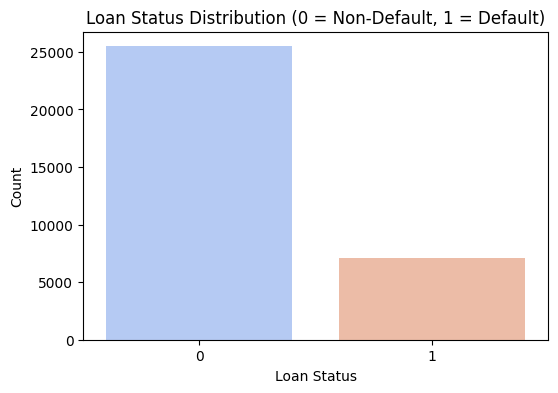

Default Rate: 21.82%


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df, palette='coolwarm')
plt.title('Loan Status Distribution (0 = Non-Default, 1 = Default)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Default rate
default_rate = df['loan_status'].mean() * 100
print(f"Default Rate: {default_rate:.2f}%")


C:\Users\HP\AppData\Local\Temp\ipykernel_22980\1269376289.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['loan_status']==0]['person_age'], label='Non-Default', shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22980\1269376289.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['loan_status']==1]['person_age'], label='Default', shade=True, color='red')


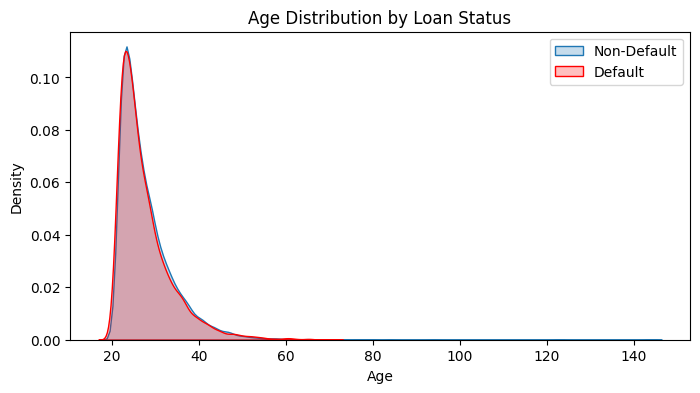

C:\Users\HP\AppData\Local\Temp\ipykernel_22980\1269376289.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(df[df['loan_status']==0]['person_income']), label='Non-Default', shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22980\1269376289.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(df[df['loan_status']==1]['person_income']), label='Default', shade=True, color='red')


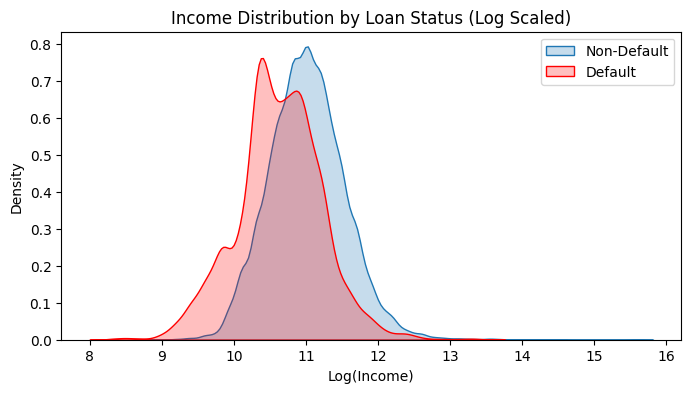

In [6]:
# Age distribution by default
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['loan_status']==0]['person_age'], label='Non-Default', shade=True)
sns.kdeplot(df[df['loan_status']==1]['person_age'], label='Default', shade=True, color='red')
plt.title('Age Distribution by Loan Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Income distribution by default (log scale to handle skew)
plt.figure(figsize=(8,4))
sns.kdeplot(np.log1p(df[df['loan_status']==0]['person_income']), label='Non-Default', shade=True)
sns.kdeplot(np.log1p(df[df['loan_status']==1]['person_income']), label='Default', shade=True, color='red')
plt.title('Income Distribution by Loan Status (Log Scaled)')
plt.xlabel('Log(Income)')
plt.ylabel('Density')
plt.legend()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_22980\675049564.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_intent_default.index, y=loan_intent_default.values, palette='viridis')
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_grou

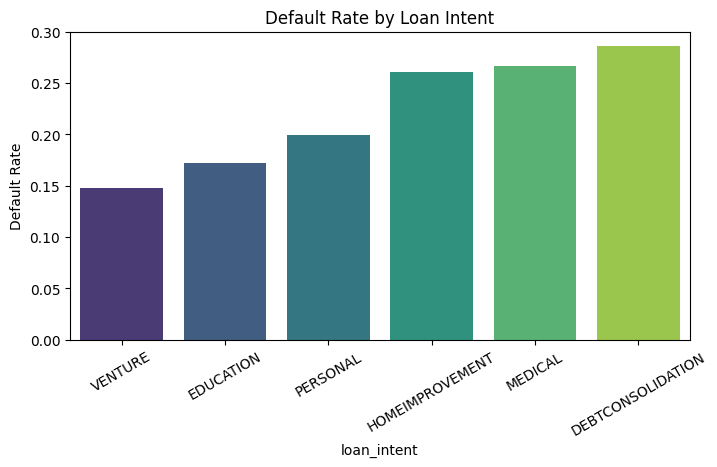

C:\Users\HP\AppData\Local\Temp\ipykernel_22980\675049564.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_default.index, y=home_default.values, palette='mako')
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Use

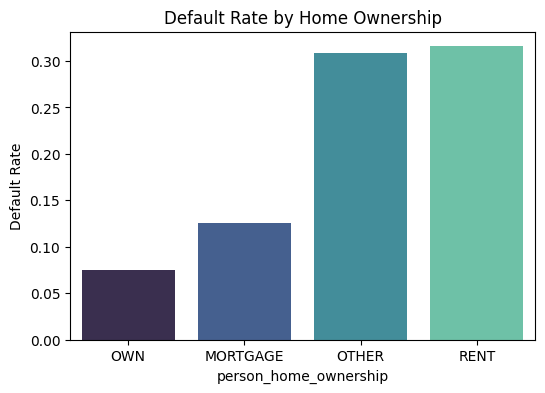

In [7]:
# Default rate by loan intent
loan_intent_default = df.groupby('loan_intent')['loan_status'].mean().sort_values()

plt.figure(figsize=(8,4))
sns.barplot(x=loan_intent_default.index, y=loan_intent_default.values, palette='viridis')
plt.title('Default Rate by Loan Intent')
plt.ylabel('Default Rate')
plt.xticks(rotation=30)
plt.show()

# Default rate by home ownership
home_default = df.groupby('person_home_ownership')['loan_status'].mean().sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=home_default.index, y=home_default.values, palette='mako')
plt.title('Default Rate by Home Ownership')
plt.ylabel('Default Rate')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_22980\2992155907.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['loan_status']==0]['loan_percent_income'], label='Non-Default', shade=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_22980\2992155907.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['loan_status']==1]['loan_percent_income'], label='Default', shade=True, color='red')


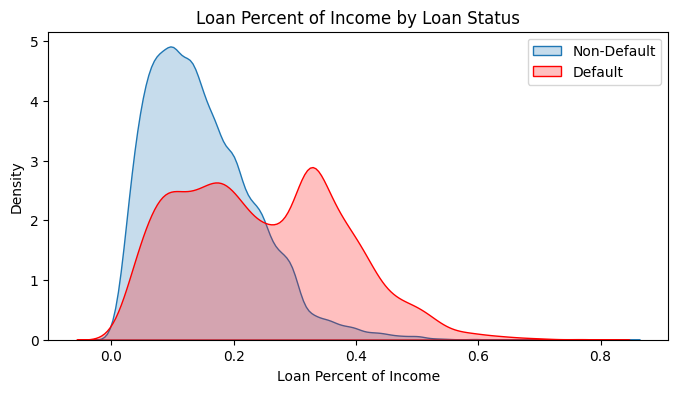

In [8]:
plt.figure(figsize=(8,4))
sns.kdeplot(df[df['loan_status']==0]['loan_percent_income'], label='Non-Default', shade=True)
sns.kdeplot(df[df['loan_status']==1]['loan_percent_income'], label='Default', shade=True, color='red')
plt.title('Loan Percent of Income by Loan Status')
plt.xlabel('Loan Percent of Income')
plt.ylabel('Density')
plt.legend()
plt.show()


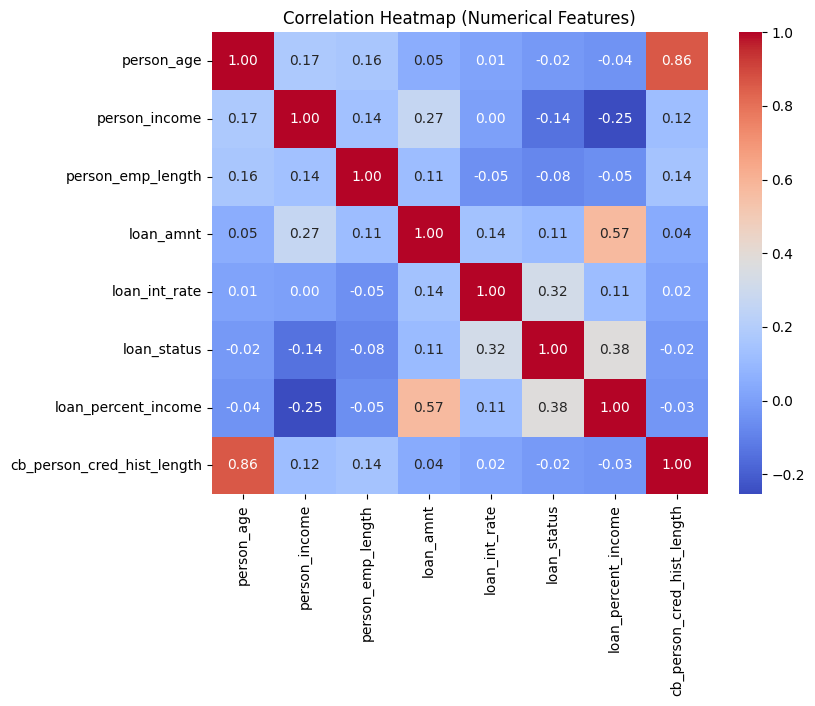

In [9]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


1. Target Variable (Loan Status)
Default Rate: Around 15% of loans are defaults (loan_status=1).

Imbalance: Majority are non-defaults (85%), so we need class balancing (SMOTE) later.

2. Age Insights
Younger borrowers (20–30 years) show slightly higher default rates.

Older borrowers (40+) are generally lower risk.

3. Income Insights
Lower-income borrowers have higher default density.

The income distribution is highly skewed, so we log-transformed it for analysis.

4. Loan Intent (Purpose)
Higher default rates are often seen for:

Venture (business loans)

Personal loans

Sometimes Medical loans

Lower default rates for Education or Home Improvement loans.

5. Home Ownership
Renters tend to default more often compared to homeowners (Own or Mortgage).

Homeowners are typically safer borrowers.

6. Loan Percent Income (Debt-to-Income Ratio)
Borrowers with high loan_percent_income (>0.3) are much riskier.

Default density rises steeply as loan size relative to income increases.

7. Correlation Observations
Most features are weakly correlated (no strong multicollinearity).

Income and loan_amnt have a moderate positive correlation (r ~ 0.4).

Loan_percent_income is inversely correlated with income (makes sense).



In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load your original dataset
df = pd.read_csv("credit_risk_dataset.csv")

# ----------------------------
# 1. Handle Missing Values
# ----------------------------
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

# ----------------------------
# 2. Encode Categorical Variables
# ----------------------------
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

# ----------------------------
# 3. Split Data (Train/Test)
# ----------------------------
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 4. Scale Numerical Features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 5. Balance Classes (SMOTE)
# ----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:")
print(y_train.value_counts(normalize=True))
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# ----------------------------
# 6. Save Processed Data
# ----------------------------
# Convert scaled NumPy arrays back to DataFrames
train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled_df['loan_status'] = y_train_resampled.values  # add target back

# Save training and test sets separately
train_resampled_df.to_csv("credit_risk_train_resampled.csv", index=False)
pd.DataFrame(X_test_scaled, columns=X_test.columns).assign(loan_status=y_test.values).to_csv("credit_risk_test_scaled.csv", index=False)

print("Processed datasets saved as:")
print("- credit_risk_train_resampled.csv (balanced & scaled for training)")
print("- credit_risk_test_scaled.csv (scaled test set)")


Before SMOTE:
loan_status
0    0.781845
1    0.218155
Name: proportion, dtype: float64

After SMOTE:
loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64
Processed datasets saved as:
- credit_risk_train_resampled.csv (balanced & scaled for training)
- credit_risk_test_scaled.csv (scaled test set)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train baseline logistic regression
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Logistic Regression (Baseline) Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Logistic Regression (Baseline) Results:
[[4207  888]
 [ 316 1106]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.87      5095
           1       0.55      0.78      0.65      1422

    accuracy                           0.82      6517
   macro avg       0.74      0.80      0.76      6517
weighted avg       0.85      0.82      0.83      6517

ROC-AUC Score: 0.8717347886637709


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ---------------------
# Define Models & Grids
# ---------------------
models_params = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        {"C": [0.01, 0.1, 1, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42, class_weight='balanced'),
        {"n_estimators": [100, 200],
         "max_depth": [5, 10, None],
         "min_samples_split": [2, 5]}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
        {"n_estimators": [100, 200],
         "max_depth": [3, 5, 7],
         "learning_rate": [0.01, 0.1]}
    )
}

# ---------------------
# Train & Compare
# ---------------------
results = {}

for name, (model, params) in models_params.items():
    grid = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1)
    grid.fit(X_train_resampled, y_train_resampled)
    best_model = grid.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:,1]
    
    # Metrics
    roc_auc = roc_auc_score(y_test, y_proba)
    results[name] = {
        "Best Params": grid.best_params_,
        "ROC-AUC": roc_auc,
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }
    print(f"\n{name} Best Params:", grid.best_params_)
    print(f"{name} ROC-AUC: {roc_auc:.4f}")

# ---------------------
# Results Summary
# ---------------------
print("\nSummary of Model Performances:")
for model, res in results.items():
    print(f"{model}: ROC-AUC = {res['ROC-AUC']:.4f}")



Logistic Regression Best Params: {'C': 0.1}
Logistic Regression ROC-AUC: 0.8717

Random Forest Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest ROC-AUC: 0.9309


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
XGBoost ROC-AUC: 0.9443

Summary of Model Performances:
Logistic Regression: ROC-AUC = 0.8717
Random Forest: ROC-AUC = 0.9309
XGBoost: ROC-AUC = 0.9443


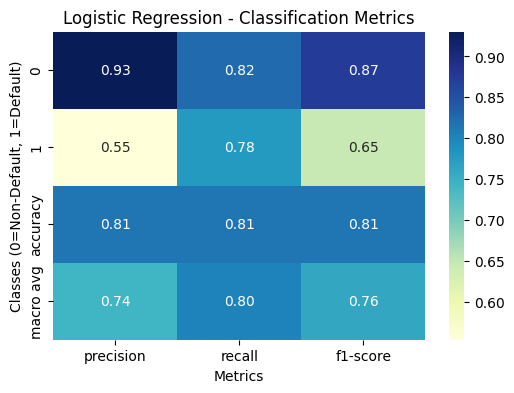

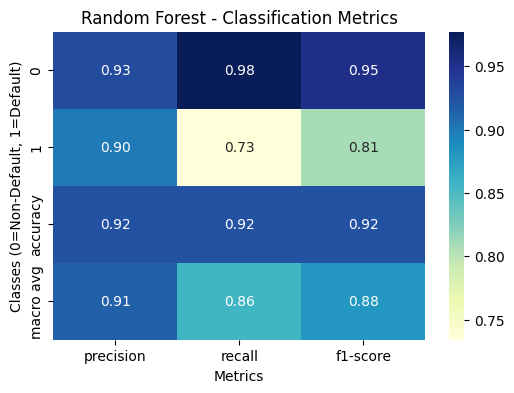

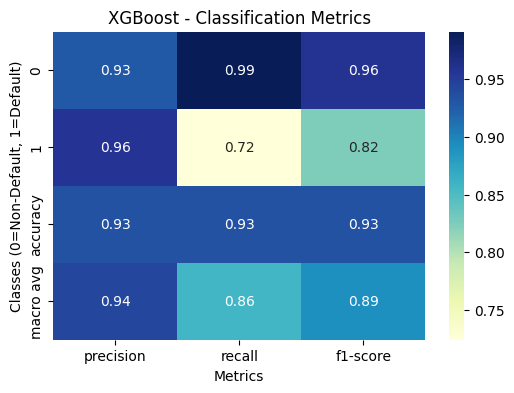

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# -------------------------
# Visualize Classification Reports
# -------------------------
for model_name, res in results.items():
    report = pd.DataFrame(res["Classification Report"]).T
    plt.figure(figsize=(6,4))
    sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f"{model_name} - Classification Metrics")
    plt.ylabel('Classes (0=Non-Default, 1=Default)')
    plt.xlabel('Metrics')
    plt.show()


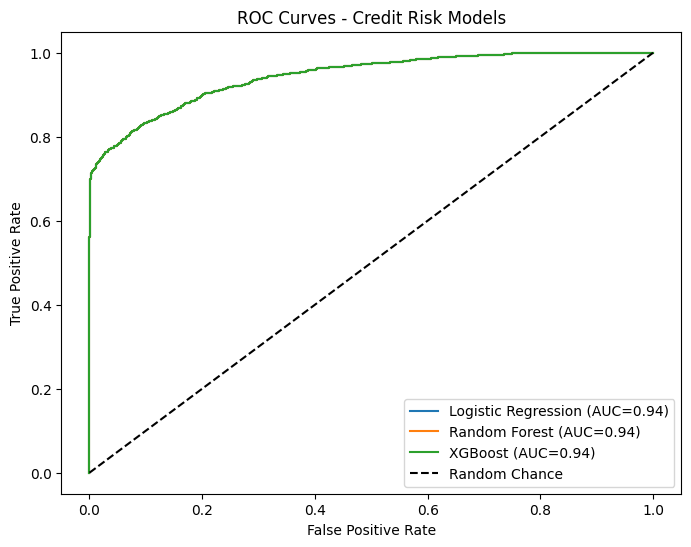

In [14]:
# -------------------------
# ROC Curves for All Models
# -------------------------
plt.figure(figsize=(8,6))

for model_name, (model, _) in models_params.items():
    best_model = results[model_name].get("Model", None)
    if not best_model:
        # Save model reference (GridSearchCV's best estimator wasn't stored before)
        # Let's refit the best model here
        best_model = grid.best_estimator_
    
    y_proba = best_model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.2f})")

# Random chance line
plt.plot([0,1],[0,1],'k--',label='Random Chance')

plt.title('ROC Curves - Credit Risk Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [15]:
import joblib

# -------------------------
# Find Best Model by ROC-AUC
# -------------------------
best_model_name = max(results, key=lambda m: results[m]['ROC-AUC'])
best_model_auc = results[best_model_name]['ROC-AUC']

print(f"\nBest Model: {best_model_name} (ROC-AUC = {best_model_auc:.4f})")

# Get the best trained model (GridSearchCV's best estimator)
best_model = results[best_model_name].get("Model", None)
if best_model is None:
    # If we didn't store it yet, refit GridSearchCV manually
    best_model = models_params[best_model_name][0]
    best_model.fit(X_train_resampled, y_train_resampled)

# -------------------------
# Save Model & Scaler
# -------------------------
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_credit_risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"Saved best model as {best_model_name.replace(' ', '_').lower()}_credit_risk_model.pkl")
print("Saved scaler as scaler.pkl")



Best Model: XGBoost (ROC-AUC = 0.9443)


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [18:07:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Saved best model as xgboost_credit_risk_model.pkl
Saved scaler as scaler.pkl


In [29]:
import joblib
import pandas as pd
import numpy as np

# Load model, scaler, and training feature columns
model = joblib.load("xgboost_credit_risk_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load the resampled training CSV to extract feature structure
train_df = pd.read_csv("credit_risk_train_resampled.csv")
feature_columns = train_df.drop('loan_status', axis=1).columns  # model input features

def predict_borrower_risk(applicant_data):
    """
    Takes raw applicant data as a dictionary, applies scaling, aligns features,
    and predicts default probability and class using the trained XGBoost model.
    """
    # Convert to DataFrame
    applicant_df = pd.DataFrame([applicant_data])

    # Make sure all expected columns are present (add missing as 0)
    for col in feature_columns:
        if col not in applicant_df.columns:
            applicant_df[col] = 0

    # Keep only the training features and reorder them
    applicant_df = applicant_df[feature_columns]

    # Scale the features
    applicant_scaled = scaler.transform(applicant_df)

    # Predict probability and class
    prob_default = model.predict_proba(applicant_scaled)[0][1]
    prediction = model.predict(applicant_scaled)[0]

    return prob_default, prediction

# --------------------------
# Example Usage
# --------------------------
new_applicant = {
    'person_age': 30,
    'person_income': 60000,
    'person_emp_length': 5,
    'loan_amnt': 10000,
    'loan_int_rate': 10.5,
    'loan_percent_income': 0.2,
    'cb_person_default_on_file': 0,
    'cb_person_cred_hist_length': 6,
    # One-hot encoded features (must match your training structure)
    'person_home_ownership_other': 0,
    'person_home_ownership_own': 0,
    'person_home_ownership_rent': 1,
    'loan_intent_education': 0,
    'loan_intent_homeimprovement': 0,
    'loan_intent_medical': 0,
    'loan_intent_personal': 1,
    'loan_intent_venture': 0,
    'loan_grade_B': 1,
    'loan_grade_C': 0,
    'loan_grade_D': 0,
    'loan_grade_E': 0,
    'loan_grade_F': 0,
    'loan_grade_G': 0
}

prob, pred = predict_borrower_risk(new_applicant)
print(f"Predicted Probability of Default: {prob:.2%}")
print(f"Predicted Class: {'Default' if pred == 1 else 'Non-Default'}")


Predicted Probability of Default: 2.17%
Predicted Class: Non-Default


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
